### Exploratory Data Analysis

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pandas.plotting import scatter_matrix

Load cleaned data

In [2]:
df_data = pd.read_csv("../dataset/cleaned_data.csv")
df_data.head()

,date,home,away,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,away_possession_pct,home_corner,away_corner,result
0,2013-01-01,West Ham United,Norwich City,2,1,16,8,5,2,0.50,0.50,11,3,3
1,2013-01-01,Tottenham Hotspur,Reading,3,1,34,7,11,3,0.68,0.32,12,3,3
2,2013-01-01,Southampton,Arsenal,1,1,9,6,5,1,0.44,0.56,3,3,1
3,2013-01-01,Swansea City,Aston Villa,2,2,25,9,6,5,0.69,0.31,3,2,1
4,2013-01-01,Manchester City,Stoke City,3,0,20,5,6,1,0.62,0.38,7,2,3


Brief information about data

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 3639 non-null   object 
 1   home                 3639 non-null   object 
 2   away                 3639 non-null   object 
 3   home_goal            3639 non-null   int64  
 4   away_goal            3639 non-null   int64  
 5   home_shot            3639 non-null   int64  
 6   away_shot            3639 non-null   int64  
 7   home_shot_on_goal    3639 non-null   int64  
 8   away_shot_on_goal    3639 non-null   int64  
 9   home_possession_pct  3639 non-null   float64
 10  away_possession_pct  3639 non-null   float64
 11  home_corner          3639 non-null   int64  
 12  away_corner          3639 non-null   int64  
 13  result               3639 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 398.1+ KB


In [4]:
df_data.describe()

,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,away_possession_pct,home_corner,away_corner,result
count,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000
mean,1.518824,1.214070,13.912613,11.354768,4.690025,3.902995,0.508200,0.484652,5.773564,4.699093,1.579280
std,1.318501,1.183337,5.823598,5.004973,2.667807,2.328963,0.128603,0.127946,3.129574,2.761726,1.332232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,0.420000,0.390000,3.000000,3.000000,0.000000
50%,1.000000,1.000000,13.000000,11.000000,4.000000,4.000000,0.510000,0.490000,5.000000,4.000000,1.000000
75%,2.000000,2.000000,17.000000,14.000000,6.000000,5.000000,0.610000,0.570000,8.000000,6.000000,3.000000
max,9.000000,9.000000,43.000000,38.000000,17.000000,15.000000,0.830000,0.820000,19.000000,19.000000,3.000000


When a football club play at home, the goals, shots, shots on goal or possession is always better than away match

<AxesSubplot: >

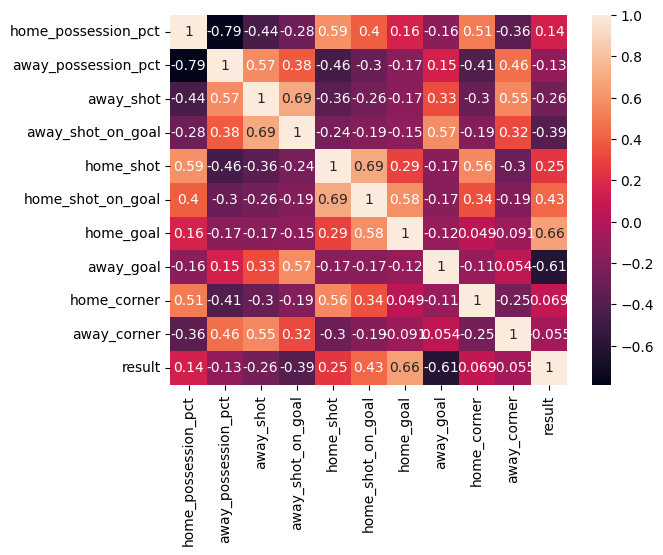

In [5]:
cols = ['home_possession_pct', 'away_possession_pct', 'away_shot', 'away_shot_on_goal', 'home_shot', 'home_shot_on_goal', 
    'home_goal', 'away_goal', 'home_corner', 'away_corner', 'result']
info = df_data[cols]
sns.heatmap(info.corr(), annot=True)

We can drop home_corner and away_corner when we consider result

array([[<AxesSubplot: xlabel='home_possession_pct', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_possession_pct', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_shot', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_shot_on_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_shot', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_shot_on_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_goal', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='home_corner', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='away_corner', ylabel='home_possession_pct'>,
        <AxesSubplot: xlabel='result', ylabel='home_possession_pct'>],
       [<AxesSubplot: xlabel='home_possession_pct', ylabel='away_possession_pct'>,
        <AxesSubplot: xlabel='away_possession_pct', ylabel='away_possession_

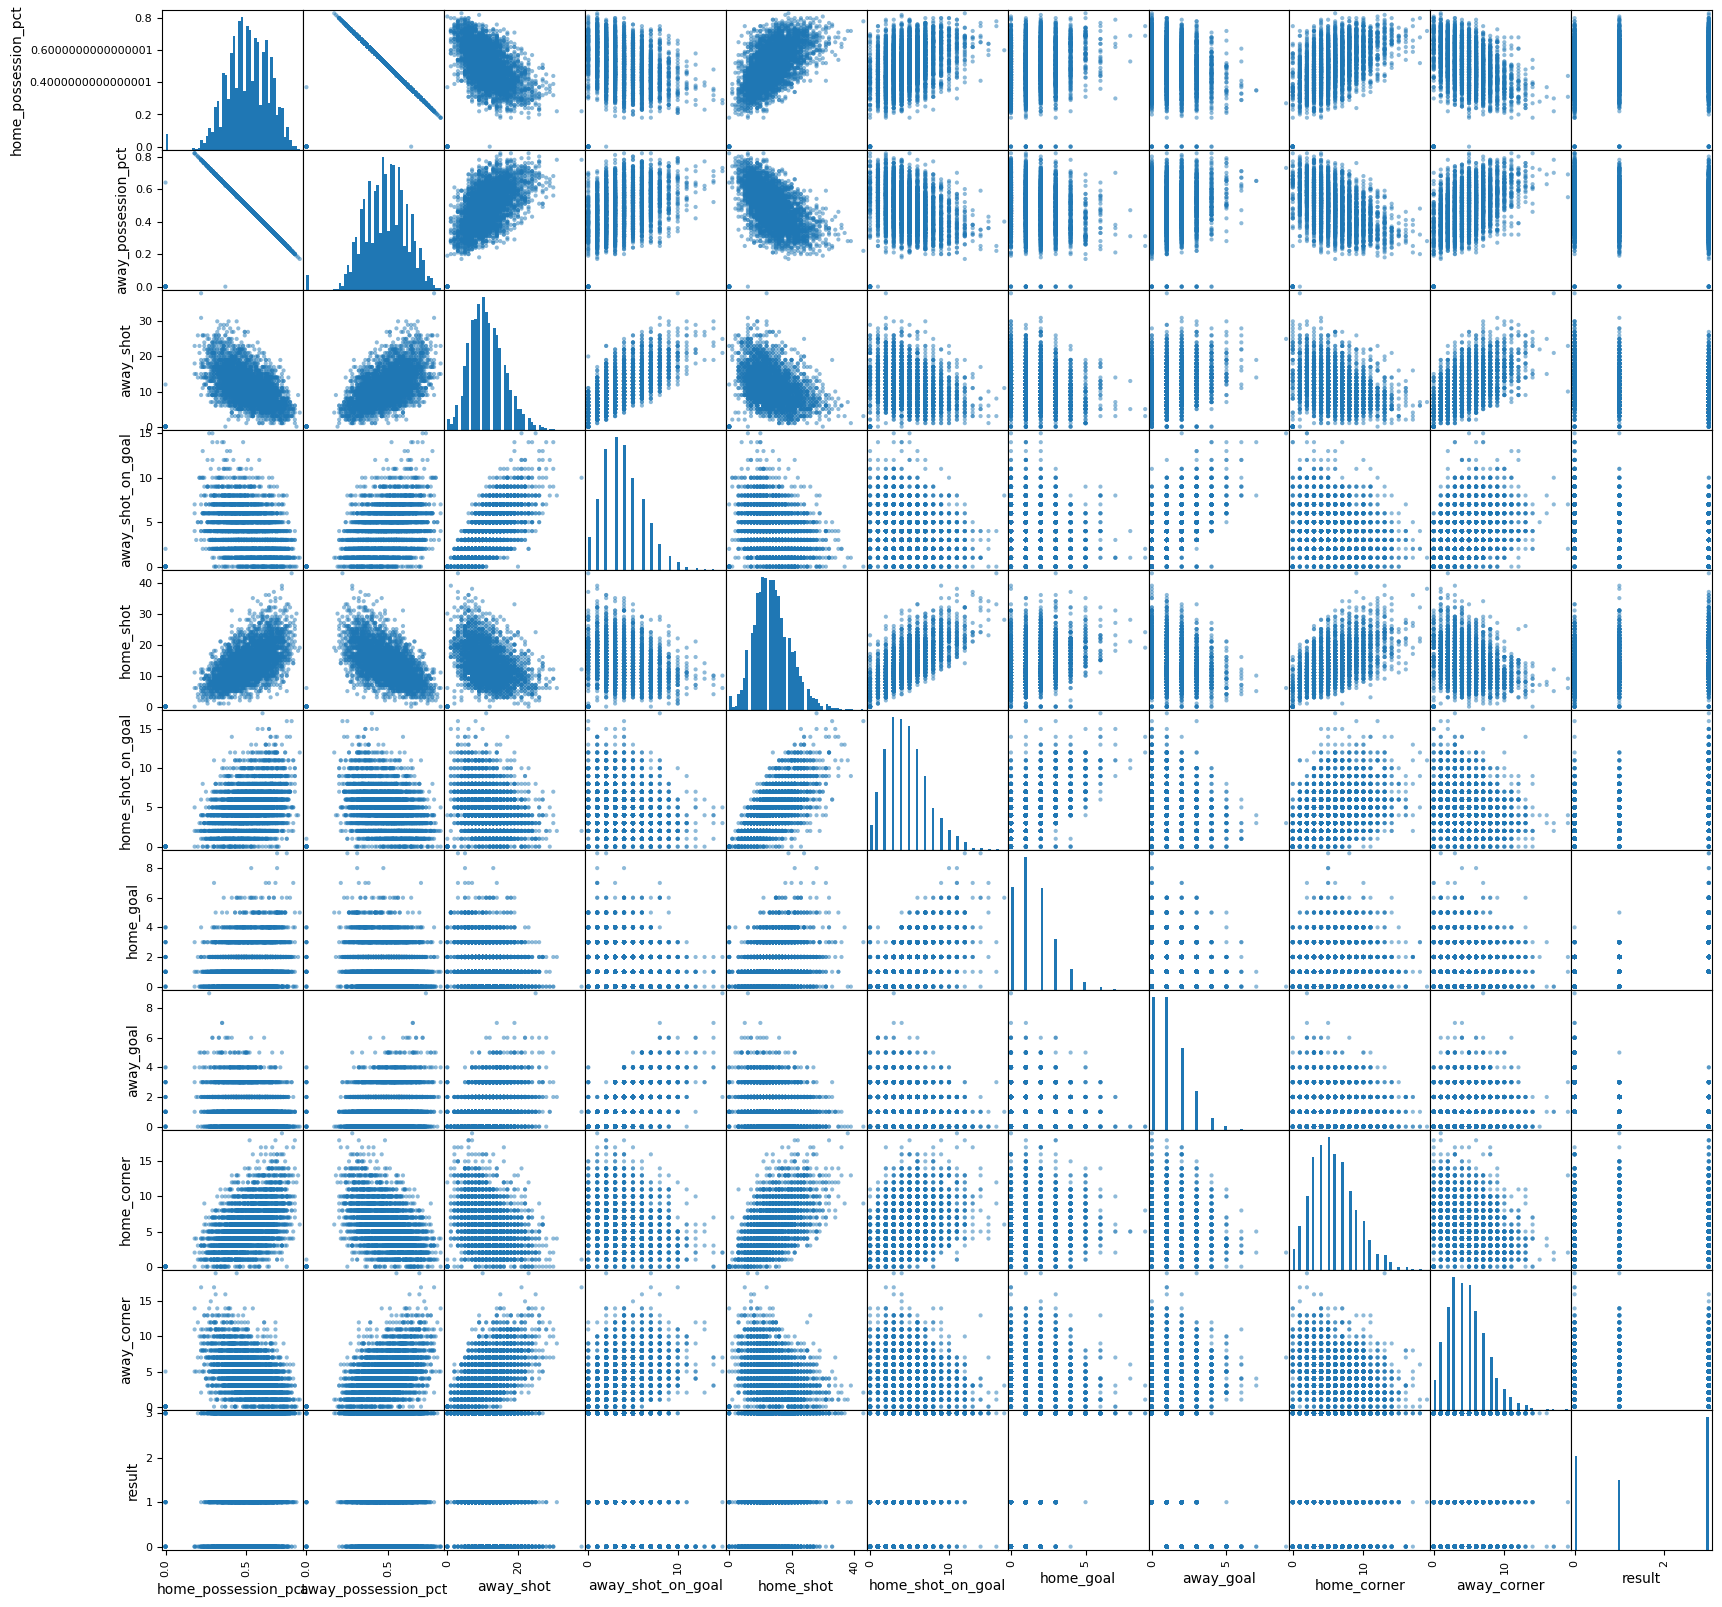

In [6]:
scatter_matrix(info, figsize=(20, 20), hist_kwds={'bins': 50})

array([[<AxesSubplot: title={'center': 'home_goal'}>,
        <AxesSubplot: title={'center': 'away_goal'}>,
        <AxesSubplot: title={'center': 'home_shot'}>],
       [<AxesSubplot: title={'center': 'away_shot'}>,
        <AxesSubplot: title={'center': 'home_shot_on_goal'}>,
        <AxesSubplot: title={'center': 'away_shot_on_goal'}>],
       [<AxesSubplot: title={'center': 'home_possession_pct'}>,
        <AxesSubplot: title={'center': 'away_possession_pct'}>,
        <AxesSubplot: title={'center': 'home_corner'}>],
       [<AxesSubplot: title={'center': 'away_corner'}>,
        <AxesSubplot: title={'center': 'result'}>, <AxesSubplot: >]],
      dtype=object)

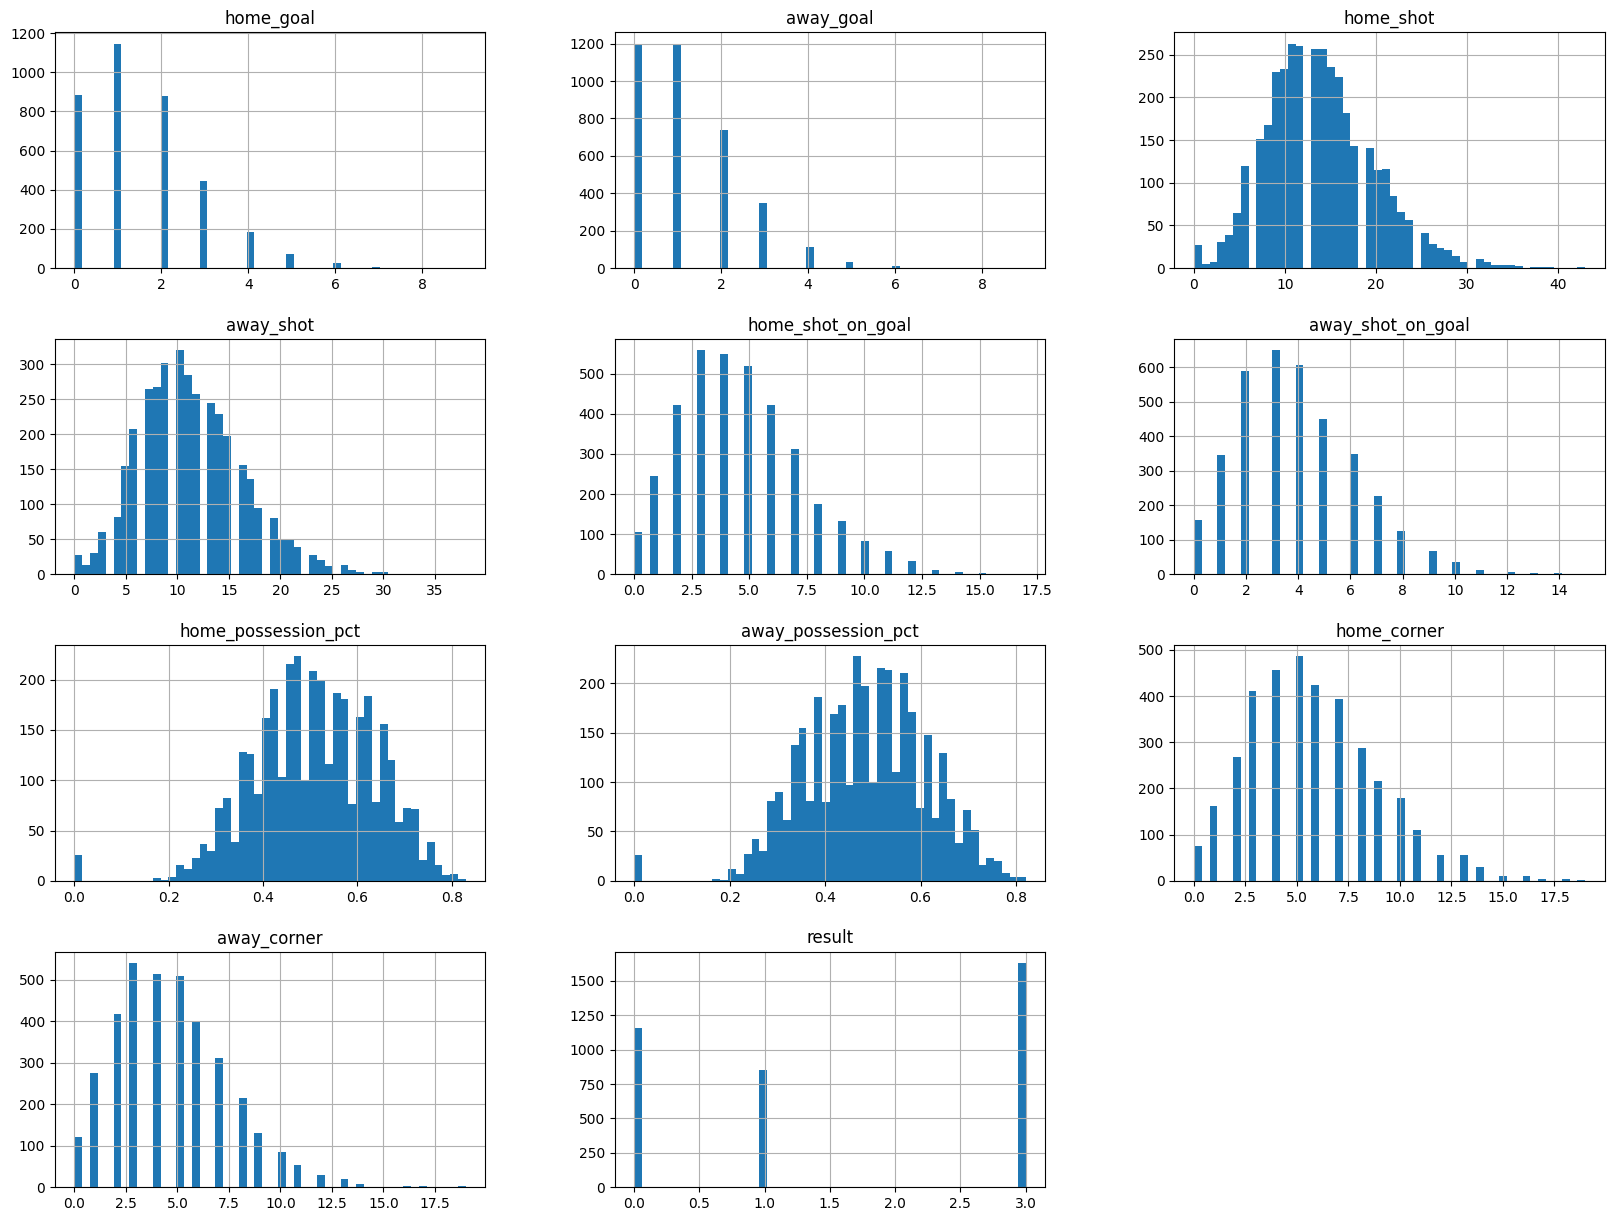

In [7]:
df_data.hist(bins=50, figsize=(20, 15))

A team at home has more numbers of 3 points (win) than away

Top correlation with result

In [8]:
df_data.corr(numeric_only=True)['result'].sort_values(ascending=False)

result                 1.000000
home_goal              0.656198
home_shot_on_goal      0.431589
home_shot              0.245605
home_possession_pct    0.141465
home_corner            0.068719
away_corner           -0.054963
away_possession_pct   -0.134471
away_shot             -0.257771
away_shot_on_goal     -0.393837
away_goal             -0.612226
Name: result, dtype: float64

In [9]:
df_data.head()

,date,home,away,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,away_possession_pct,home_corner,away_corner,result
0,2013-01-01,West Ham United,Norwich City,2,1,16,8,5,2,0.50,0.50,11,3,3
1,2013-01-01,Tottenham Hotspur,Reading,3,1,34,7,11,3,0.68,0.32,12,3,3
2,2013-01-01,Southampton,Arsenal,1,1,9,6,5,1,0.44,0.56,3,3,1
3,2013-01-01,Swansea City,Aston Villa,2,2,25,9,6,5,0.69,0.31,3,2,1
4,2013-01-01,Manchester City,Stoke City,3,0,20,5,6,1,0.62,0.38,7,2,3


Make mean of 10 match later (home team from home matches and away team from away matches)

In [10]:
types = ['home', 'away']
df_mean = df_data.copy()

for type in types:
    gk = df_data.groupby(type)
    for team in df_mean[type].unique():
        temp = gk.get_group(team).sort_values('date', ascending=True)
        df_mean.loc[temp.index, [f'mean_10_{type}_goal']] = temp.rolling(10, min_periods=0)[f'{type}_goal'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_possession_pct']] = temp.rolling(10, min_periods=0)[f'{type}_possession_pct'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_shot_on_goal']] = temp.rolling(10, min_periods=0)[f'{type}_shot_on_goal'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_shot']] = temp.rolling(10, min_periods=0)[f'{type}_shot'].mean()
        df_mean.loc[temp.index, [f'mean_10_{type}_corner']] = temp.rolling(10, min_periods=0)[f'{type}_corner'].mean()

df_mean.head()

,date,home,away,home_goal,away_goal,home_shot,away_shot,home_shot_on_goal,away_shot_on_goal,home_possession_pct,...,mean_10_home_goal,mean_10_home_possession_pct,mean_10_home_shot_on_goal,mean_10_home_shot,mean_10_home_corner,mean_10_away_goal,mean_10_away_possession_pct,mean_10_away_shot_on_goal,mean_10_away_shot,mean_10_away_corner
0,2013-01-01,West Ham United,Norwich City,2,1,16,8,5,2,0.50,...,2.0,0.50,5.0,16.0,11.0,1.0,0.50,2.0,8.0,3.0
1,2013-01-01,Tottenham Hotspur,Reading,3,1,34,7,11,3,0.68,...,3.0,0.68,11.0,34.0,12.0,1.0,0.32,3.0,7.0,3.0
2,2013-01-01,Southampton,Arsenal,1,1,9,6,5,1,0.44,...,1.0,0.44,5.0,9.0,3.0,1.0,0.56,1.0,6.0,3.0
3,2013-01-01,Swansea City,Aston Villa,2,2,25,9,6,5,0.69,...,2.0,0.69,6.0,25.0,3.0,2.0,0.31,5.0,9.0,2.0
4,2013-01-01,Manchester City,Stoke City,3,0,20,5,6,1,0.62,...,3.0,0.62,6.0,20.0,7.0,0.0,0.38,1.0,5.0,2.0


Drop unnecessary columns

In [11]:
cols = ['date', 'home', 'away', 'home_possession_pct', 'away_possession_pct', 'away_shot', 'away_shot_on_goal', 'home_shot', 'home_shot_on_goal', 
    'home_goal', 'away_goal', 'home_corner', 'away_corner']
df_mean.drop(cols, axis=1, inplace=True)
df_mean.head()

,result,mean_10_home_goal,mean_10_home_possession_pct,mean_10_home_shot_on_goal,mean_10_home_shot,mean_10_home_corner,mean_10_away_goal,mean_10_away_possession_pct,mean_10_away_shot_on_goal,mean_10_away_shot,mean_10_away_corner
0,3,2.0,0.50,5.0,16.0,11.0,1.0,0.50,2.0,8.0,3.0
1,3,3.0,0.68,11.0,34.0,12.0,1.0,0.32,3.0,7.0,3.0
2,1,1.0,0.44,5.0,9.0,3.0,1.0,0.56,1.0,6.0,3.0
3,1,2.0,0.69,6.0,25.0,3.0,2.0,0.31,5.0,9.0,2.0
4,3,3.0,0.62,6.0,20.0,7.0,0.0,0.38,1.0,5.0,2.0


In [12]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   result                       3639 non-null   int64  
 1   mean_10_home_goal            3639 non-null   float64
 2   mean_10_home_possession_pct  3639 non-null   float64
 3   mean_10_home_shot_on_goal    3639 non-null   float64
 4   mean_10_home_shot            3639 non-null   float64
 5   mean_10_home_corner          3639 non-null   float64
 6   mean_10_away_goal            3639 non-null   float64
 7   mean_10_away_possession_pct  3639 non-null   float64
 8   mean_10_away_shot_on_goal    3639 non-null   float64
 9   mean_10_away_shot            3639 non-null   float64
 10  mean_10_away_corner          3639 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 312.9 KB


Top correlation with result

In [13]:
df_mean.corr(numeric_only=True)['result'].sort_values(ascending=False)

result                         1.000000
mean_10_home_goal              0.367537
mean_10_home_shot_on_goal      0.321079
mean_10_home_shot              0.266766
mean_10_home_possession_pct    0.233081
mean_10_home_corner            0.178786
mean_10_away_corner           -0.187157
mean_10_away_possession_pct   -0.222676
mean_10_away_shot             -0.268170
mean_10_away_shot_on_goal     -0.307261
mean_10_away_goal             -0.346652
Name: result, dtype: float64

Save analyzed data to csv file

In [14]:
df_mean.to_csv("../dataset/analyzed_data.csv", index=False)